<a href="https://colab.research.google.com/github/hinazargham/DeepLearning_ColabNotebooks/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Listing 2.1 Loading the MNIST dataset in Keras

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [ ]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [ ]:
print(test_images.shape)
train_images.shape

(10000, 28, 28)


(60000, 28, 28)

Class Label: 5


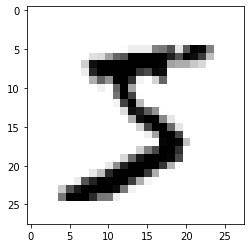

In [ ]:
import matplotlib.pyplot as plt

digit = train_images[0]
print("Class Label:",train_labels[0])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Class Label: 2


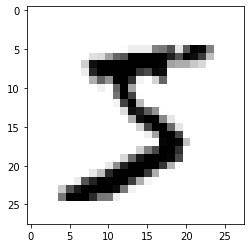

In [ ]:
import matplotlib.pyplot as plt

digit = train_images[0]
print("Class Label:",train_labels[5])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Class Label: 7


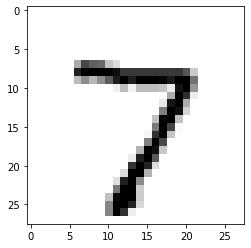

In [ ]:
digit = test_images[0]
print("Class Label:",test_labels[0])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
import numpy as np
print(train_labels)
print(np.unique(train_labels))

[5 0 4 ... 5 6 8]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
import numpy as np
print(test_labels)
print(np.unique(test_labels))

[7 2 1 ... 4 5 6]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
train_labels.shape

(60000,)

# Listing 2.2 The network architecture

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

28*28

(28*28, )
(784,)

[[1,2,3],
[4,6,5],
[7,8,9]]

[1,2,3,4,6,5,7,8,9]

# Listing 2.3 The compilation step

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
train_images.ndim

3

In [ ]:
50/255

0.19607843137254902

# Listing 2.4 Preparing the image data

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)) # change shape from 3d to 2d and  image from 2d to 1d
train_images = train_images.astype('float32') / 255 #Normalization scale value is between o and 1


test_images = test_images.reshape((10000, 28 * 28)) #phly 28*28 piexelpelana hoga
test_images = test_images.astype('float32') / 255 #Normalization

# Listing 2.5 Preparing the labels

In [ ]:
train_labels[0]

5

# One-Hot-Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_labels[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_images.shape

(60000, 784)

## Now Train your Model

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 47s 23ms/step - loss: 0.4324 - accuracy: 0.8751
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1106 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0690 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0486 - accuracy: 0.9857
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0344 - accuracy: 0.9897


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0641 - accuracy: 0.9809
test_acc: 0.98089998960495


In [ ]:
# network.save("mnist.h5")